# Kaggle - Notebook de base "Titanic"

Premier exemple de Toy dataset destine a mettre en oeuvre des algorithmes de classification sur un jeu de donnees simple

### Import des bibliotheques

from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

In [16]:
import pandas as pd
import numpy as np

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [19]:
# Vérification du format d'export supporte
fig = plt.figure()
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 432x288 with 0 Axes>

In [20]:
!jt -r

Reset css and font defaults in:
/home/sushostiou/.jupyter/custom &
/home/sushostiou/.local/share/jupyter/nbextensions


### Import et exploration

Import du jeu de donnees d'entrainement et exploration.  
On créée, lors de l'import, un jeu de validation (répartition à 80% training + 20% validation).  
Le jeu de test est fourni par la plateforme

In [21]:
titanic = pd.read_csv('train.csv')

In [22]:
# Création d'un training set
train_set, valid_test = train_test_split(titanic, test_size=0.2,random_state=1977)

Procédons à quelques explorations

In [23]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.0,0,0,STON/O 2. 3101292,7.9250,NaN,S
265,266,0,2,"Reeves, Mr. David",male,36.0,0,0,C.A. 17248,10.5000,NaN,S
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S
775,776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.0,0,0,347078,7.7500,NaN,S


En guise de premiere approche, on peut supposer que le nom (Name) présente un intérêt limité (sauf a réaliser une extraction de expressions régulières pour essayer de déterminer si patterns peuvent en émerger).  
SibSP : nombre d'épouses / enfants présents à bord  
Le numéro de Ticket pourrait présenter un intérêt en procédant à un nettoyage préalable.  
Cabin : prise en compte du numero de pont Deck. Beaucoup de données semblent absentes sur ce champ.  
Embarked : port d'embarquement.  

In [24]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,442.317416,0.390449,2.303371,29.695367,0.516854,0.386236,31.371933
std,253.298905,0.488194,0.832254,14.830028,1.063258,0.801533,47.428278
min,2.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,435.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,662.250000,1.000000,3.000000,39.000000,1.000000,0.000000,30.548950
max,889.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 666 to 179
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


Le traitement des donnees manquantes nécessite de définir une approche cohérente.  
1) saisie de l'age à partir de la valeur mediane de ce champ (a extrapoler aux sous ensembles de test / validation)  
2) Cabin a supprimer  
3) Embarked : seuls 2 champs manquent. Compléter avec le port ayant l'occurence la plus élevée

In [26]:
train_set['Cabin'].dropna()

307      C65
558      E67
711     C124
527      C95
273     C118
       ...  
457      D21
849      C92
715    F G73
707      E24
429      E10
Name: Cabin, Length: 165, dtype: object

La premiere lettre correspond au pont. Trop de donnees manquantes. A supprimer

Exploration graphique des donnees

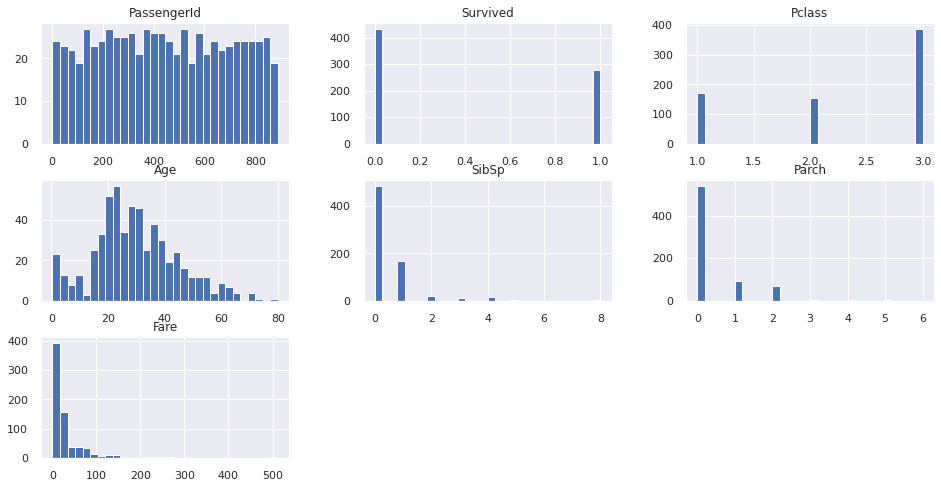

In [27]:
train_set.hist(figsize = (16,8),bins=30)
plt.show()

Creation d'une séparation par categorie Survived Y/N

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

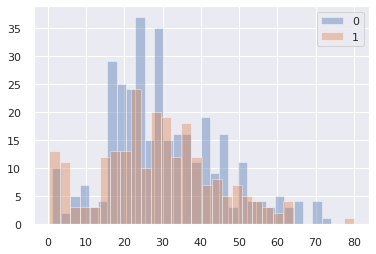

In [28]:
train_set.groupby("Survived").Age.hist(alpha=0.4,bins=30,legend=True)

Essai de visualisation avec ggplot

In [29]:
from plotnine import *

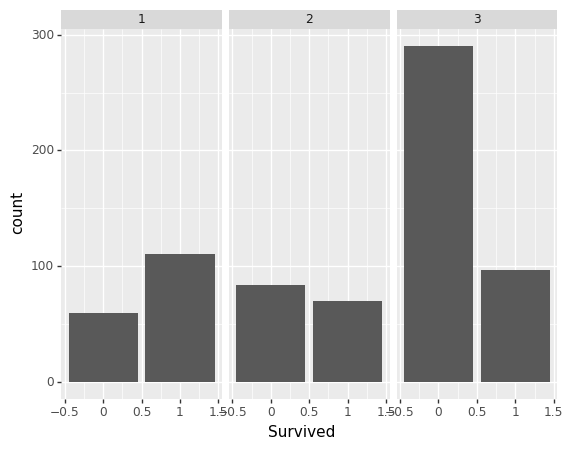

<ggplot: (8779916698076)>

In [30]:
ggplot(train_set)+ \
  geom_bar(mapping=aes(x='Survived',fill= 'Survived'))+ \
  facet_wrap( ['Pclass'])

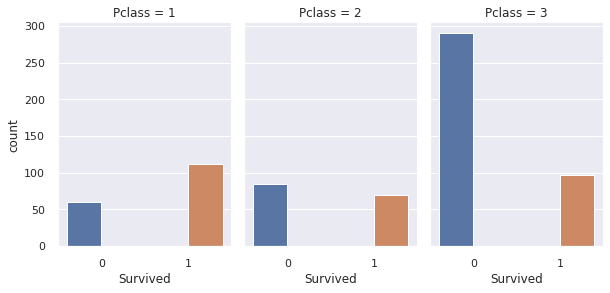

In [31]:
g = sns.catplot(x="Survived", hue="Survived", col="Pclass",
                data=train_set, kind="count",
                height=4, aspect=.7);

It appears that passengers of 1st class had higher chances to survive while 3rd class passengers had 1/3 chances of surviving & 2/3 of not surviving.  
The Pclass variable will be an important predictor.  
Complétons l'analyse en cherchant une relation avec le sexe et la survie

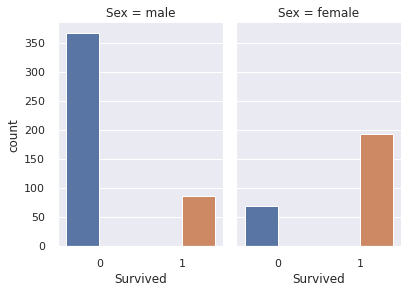

In [32]:
g = sns.catplot(x="Survived", hue="Survived", col="Sex",
                data=train_set, kind="count",
                height=4, aspect=.7);

Le fait d'être une femme augmente les chances de survie de manière significative.  
Recherchons maintenant l'incidence de l'age

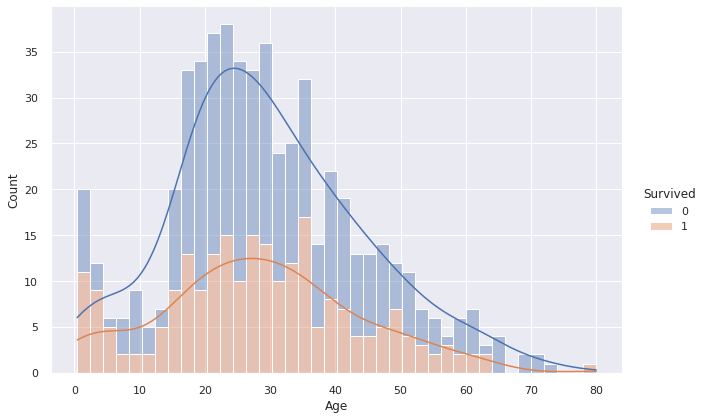

In [33]:
sns.displot(data=train_set, x="Age", hue='Survived',multiple="stack", alpha=0.4,bins=40,kde=True,
           height=6, aspect=1.5)

Being a kid (under 10yo) increases chances to survive.  
While older people (over 70) has few chances to survive.  

Identifions l'incidence du tarif sur les chances de survie. On élimine les tarifs > 200

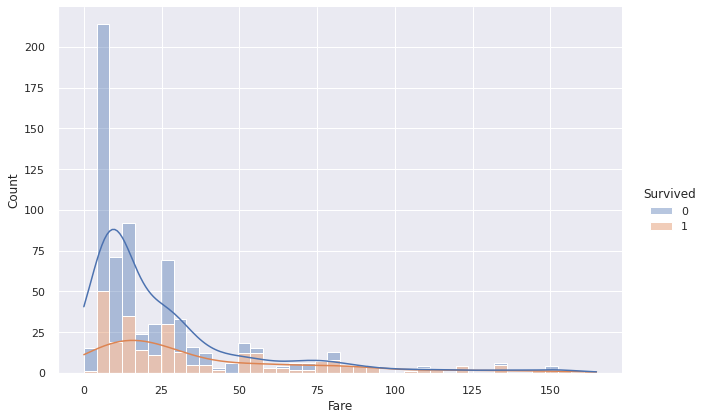

In [34]:
sns.displot(data=train_set[train_set['Fare']<200], x="Fare", hue='Survived',
            multiple="stack", alpha=0.4,bins=40,kde=True,
           height=6, aspect=1.5)

Having purchased cheap tickets incresed the chances of not surviving.  
Let see the influence of the boarding port.  

Voyons l'incidence du port d'embarquement

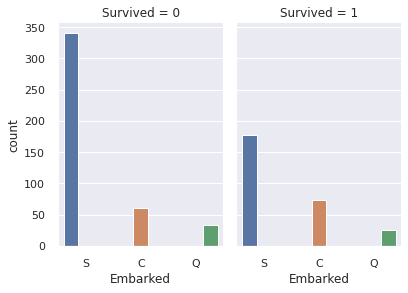

In [35]:
g = sns.catplot(x="Embarked", hue="Embarked", col="Survived",
                data=train_set, kind="count",
                height=4, aspect=.7);

En prenant en compte le port d'embarquement ded manière individuelle, le ratio Survie / Mort est le plus élevé pour les passagers  
ayant embarqué à Calais.  
Dans l'absolu, la majorité des passagers ayant embarqué à Southsampton, on retrouve donc la prédominance de ces passagers dans les survivants  
au final.

Parc  - Number of parents / children aboard the Titanic

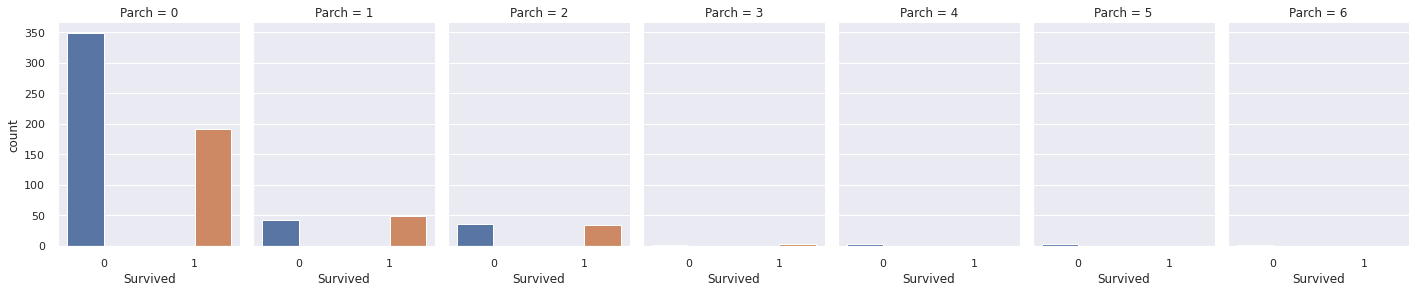

In [36]:
g = sns.catplot(x="Survived", hue="Survived", col="Parch",
                data=train_set, kind="count",
                height=4, aspect=.7);

Le fait d'être associé à des parents & enfants augmente les chances de survie

Sibsp variable : Nb of siblings / spouses aboard the Titanic
(siblings = freres et soeurs)
=> Le fait d'être associé à une épouse ou des frères et soeurs améliore là aussi les chances de survie

In [ ]:
g = sns.catplot(x="Survived", hue="Survived", col="SibSp",
                data=train_set, kind="count",
                height=4, aspect=.7);